Dependecies: Add your Dependencies here

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize']= 10,10

In [ ]:
file_path='/content/credit_scoring_sample.csv'

Read the dataset from the CSV file

In [ ]:
# dic = {'Serious_Dlq_in_2yrs':0,'Debt_Ratio':0.24,'age':23,'Number_Of_Time_30-59_Days_Past_Due':0,'Number_Of_Time_60-89_Days_Past_Due':0,'Number_Of_Times_90_Days_Late':0,'Monthly_Income':78,'Dependents':0}
# data = pd.DataFrame(dic,index=[0])
# data
data = pd.read_csv(file_path)
data.head()

,Serious_Dlq_in_2yrs,Debt_Ratio,age,Number_Of_Time_30-59_Days_Past_Due,Number_Of_Time_60-89_Days_Past_Due,Number_Of_Times_90_Days_Late,Monthly_Income,Dependents
0,0,454.000000,21,0,0,0,NaN,NaN
1,1,0.174377,22,1,1,1,280.0,0.0
2,0,0.000000,22,0,0,0,1500.0,0.0
3,1,0.000000,23,98,98,98,NaN,0.0
4,1,111.000000,23,0,1,2,NaN,0.0


<BarContainer object of 2 artists>

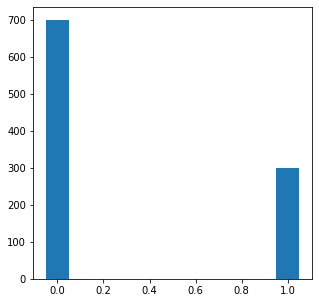

In [ ]:
# Plot Distrubution of the target variable
import matplotlib.pyplot as plt

values , counts= np.unique(data.iloc[:,0],return_counts=True)
plt.figure(figsize=(5,5))
plt.bar(values,counts,width=0.1)

In [ ]:
# Handle the NaN values
for i in data.keys():
  a= np.mean(data.loc[:,i])
  a = int(a)
  data.loc[:,i] = data.loc[:,i].replace(np.nan, a+1)

data

,Serious_Dlq_in_2yrs,Debt_Ratio,age,Number_Of_Time_30-59_Days_Past_Due,Number_Of_Time_60-89_Days_Past_Due,Number_Of_Times_90_Days_Late,Monthly_Income,Dependents
0,0,454.000000,21,0,0,0,6183.0,1.0
1,1,0.174377,22,1,1,1,280.0,0.0
2,0,0.000000,22,0,0,0,1500.0,0.0
3,1,0.000000,23,98,98,98,6183.0,0.0
4,1,111.000000,23,0,1,2,6183.0,0.0
...,...,...,...,...,...,...,...,...
994,0,0.065758,89,0,0,0,10416.0,0.0
995,0,0.019423,90,0,0,0,3500.0,0.0
996,0,0.173890,91,0,0,0,5767.0,0.0
997,0,32.000000,92,0,0,0,6183.0,0.0


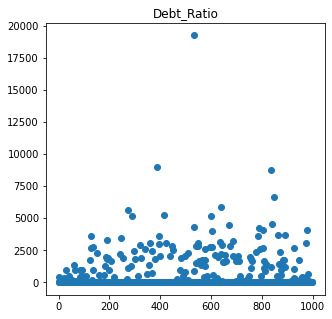

<Figure size 360x360 with 0 Axes>

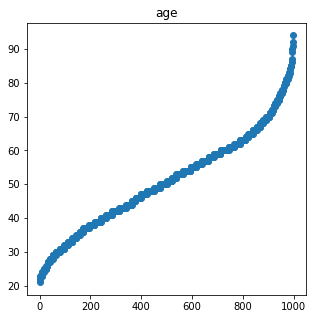

<Figure size 360x360 with 0 Axes>

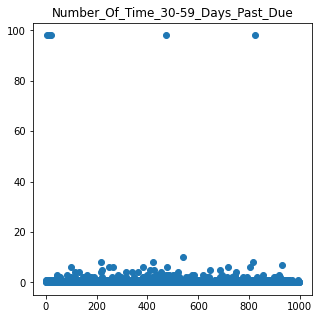

<Figure size 360x360 with 0 Axes>

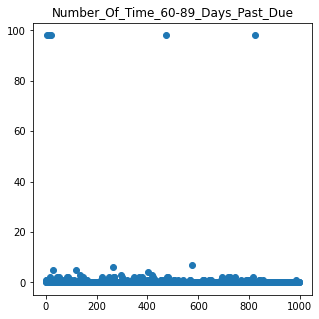

<Figure size 360x360 with 0 Axes>

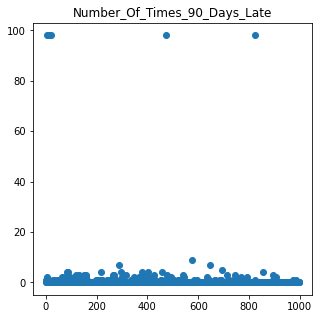

<Figure size 360x360 with 0 Axes>

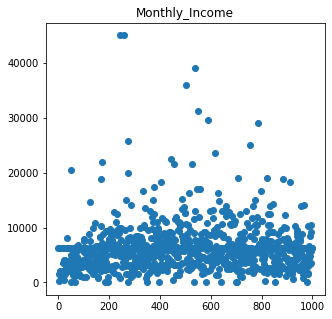

<Figure size 360x360 with 0 Axes>

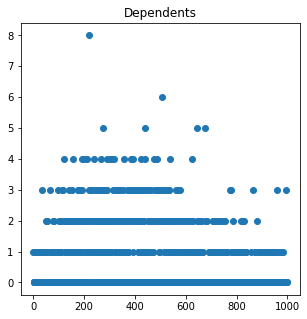

<Figure size 360x360 with 0 Axes>

In [ ]:
# Visualize the distribution of data for every feature
for i in data.keys()[1:]:
  plt.figure(figsize=(5,5))
  plt.scatter(y=data.loc[:,i],x=data.index)
  plt.title(f"{i}")
  plt.figure(figsize=(5,5))

Train the Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV


In [ ]:
# seperate depedendent and independent variables from the dataset
from sklearn.model_selection import train_test_split
dependent = data.iloc[:,0]
independent = data.iloc[:,1:]

train_x ,test_x, train_y , test_y = train_test_split(independent,dependent,shuffle=True,test_size= 250)
print(dependent)
print(independent)

0      0
1      1
2      0
3      1
4      1
      ..
994    0
995    0
996    0
997    0
998    0
Name: Serious_Dlq_in_2yrs, Length: 999, dtype: int64
     Debt_Ratio  age  ...  Monthly_Income  Dependents
0    454.000000   21  ...          6183.0         1.0
1      0.174377   22  ...           280.0         0.0
2      0.000000   22  ...          1500.0         0.0
3      0.000000   23  ...          6183.0         0.0
4    111.000000   23  ...          6183.0         0.0
..          ...  ...  ...             ...         ...
994    0.065758   89  ...         10416.0         0.0
995    0.019423   90  ...          3500.0         0.0
996    0.173890   91  ...          5767.0         0.0
997   32.000000   92  ...          6183.0         0.0
998    0.000000   94  ...          6183.0         0.0

[999 rows x 7 columns]


testing score is :  0.72
training score is :  1.0


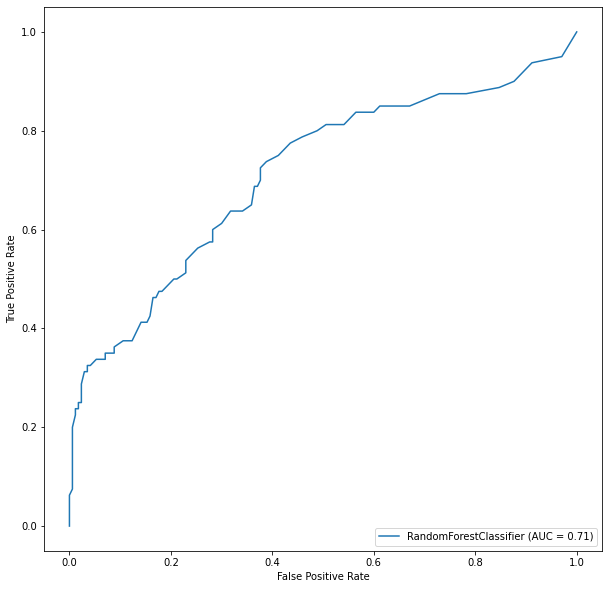

In [ ]:
# define paramerts for the random forest
from sklearn.metrics import plot_roc_curve,auc,roc_auc_score
parameters = {'max_features': [1, 2, 4], 'min_samples_leaf': [3, 5, 7, 9], 'max_depth': [5,10,15]}

rf = RandomForestClassifier(n_estimators=100)
rf.fit(train_x,train_y)
print("testing score is : ", rf.score(test_x,test_y))
print("training score is : ",rf.score(train_x,train_y))
plot_roc_curve(rf , test_x,test_y)

In [ ]:
# perform cross validation
def getscore(model,x_train,y_train,x_test,y_test):
  model.fit(x_train,y_train)
  return model.score(x_test,y_test)
l = []
skf = StratifiedKFold(n_splits=5, shuffle=True)
for train,test in skf.split(independent,dependent):
  x_train,x_test = independent.iloc[train,:],independent.iloc[test,:]
  y_train , y_test = dependent[train],dependent[test]
  l.append(getscore(rf,x_train,y_train,x_test,y_test))
print(l)



[0.8, 0.8, 0.74, 0.77, 0.7788944723618091]


In [ ]:
# perform grid search
grid_search = GridSearchCV(rf, parameters, n_jobs=-1, scoring='roc_auc', cv=skf)
grid_search.fit(train_x,train_y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                          

{'max_depth': 5, 'max_features': 2, 'min_samples_leaf': 5}
the best score is :  0.8401163930409213
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


Text(0, 0.5, 'crossvalidation score')

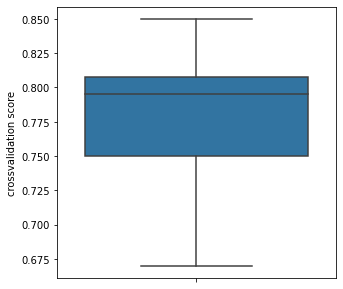

In [ ]:
#Get the best score from the grid search
print(grid_search.best_params_)

print("the best score is : ",grid_search.best_score_)

print(grid_search.best_estimator_)
from sklearn.model_selection import cross_val_score
l1 = cross_val_score(grid_search.best_estimator_,independent,dependent,cv=10)
plt.figure(figsize=(5,5))
bx1 = sns.boxplot(y = l1)
plt.ylabel("crossvalidation score")

In [ ]:
# Find the feature which has the weakest impact in Random Forest Model
importance = grid_search.best_estimator_.feature_importances_
least = ""
value = importance[0]
for i in range(len(independent.keys())):
  # print("feature : ", independent.keys()[i], ", feature importance ",importance[i])
  if(value > importance[i]):
    value = importance[i]
    least = independent.keys()[i]
print("least important feature is : ",least)

least important feature is :  Dependents


In [ ]:
# Perform bagging classification using decision trees as the base classifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier(max_depth = 2)

bagging = BaggingClassifier(base_estimator = clf1 ,n_estimators=100,max_features=1,random_state=5)
bagging.fit(train_x,train_y)


# print(bagging.predict(test_x))
print(bagging.score(test_x,test_y))

print(bagging.estimators_)

0.704
[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1228472244, splitter='best'), DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1538648557, splitter='best'), DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, m

In [ ]:
# get a list of models to evaluate

def get_models():
	return [BaggingClassifier(n_estimators= 10*i+1) for i in range(2,7,1)]


In [ ]:
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# write your code here
  scores = []
  for i in model:
    scores.append(cross_val_score(i,X,y,cv = 10))
  return scores

In [ ]:
# Summarize the performance by getting mean and standard deviation of scores
scores1 = evaluate_model(get_models(),independent,dependent)
bestmodel = []
mean_ = 0
for scores in scores1:
  a = np.array(scores)
  print("mean is : ",a.mean())
  if(mean_ < a.mean()):
    mean_ = a.mean()
    bestmodel = scores
  print("standard deviation is : " ,a.std())

print(scores1)
print(bestmodel)


mean is :  0.5407777777777778
standard deviation is :  0.18391090838289667
mean is :  0.5627676767676767
standard deviation is :  0.1747149219402186
mean is :  0.5787676767676767
standard deviation is :  0.15943882303884152
mean is :  0.5637777777777778
standard deviation is :  0.16741697776642742
mean is :  0.5817676767676766
standard deviation is :  0.16476993728045464
[array([0.33      , 0.62      , 0.45      , 0.32      , 0.38      ,
       0.73      , 0.34      , 0.71      , 0.75      , 0.77777778]), array([0.32      , 0.62      , 0.44      , 0.3       , 0.43      ,
       0.7       , 0.54      , 0.7       , 0.81      , 0.76767677]), array([0.32      , 0.6       , 0.61      , 0.3       , 0.48      ,
       0.62      , 0.64      , 0.64      , 0.81      , 0.76767677]), array([0.33      , 0.66      , 0.41      , 0.36      , 0.4       ,
       0.69      , 0.55      , 0.67      , 0.79      , 0.77777778]), array([0.32      , 0.59      , 0.5       , 0.32      , 0.46      ,
       0.65   

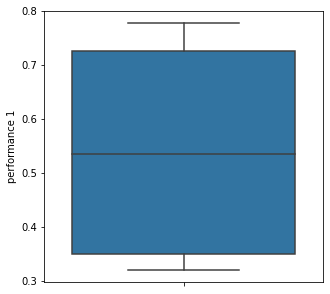

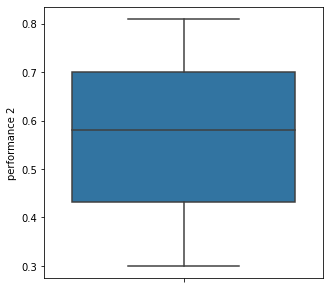

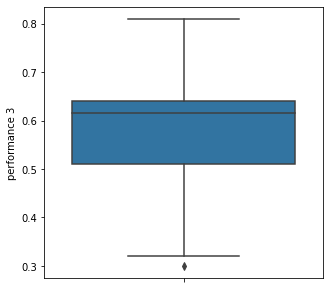

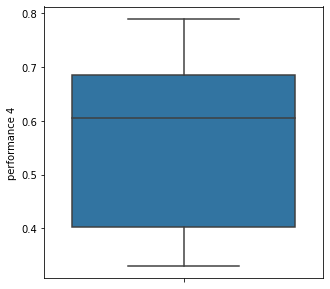

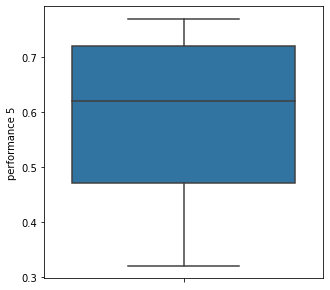

In [ ]:
# Plot the model performance for comparison using boxplot
j =1
for scores in scores1:
  import matplotlib.pyplot as plt
  plt.figure(figsize=(5,5))
  bx2 = sns.boxplot(y=scores)
  plt.ylabel(f"performance {j}")
  j+=1
  plt.show()



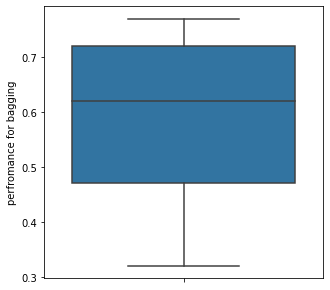

Text(0, 0.5, 'performance for random forest')

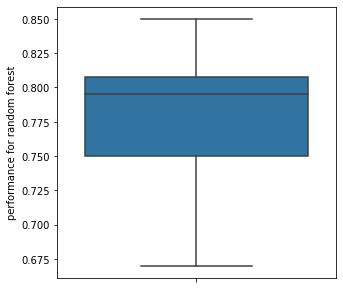

In [ ]:
# Compare the best performance of bagging with random forest using boxplot
plt.figure(figsize=(5,5))
bx2 = sns.boxplot(y=bestmodel)
plt.ylabel("perfromance for bagging")
plt.show()
plt.figure(figsize=(5,5))
bx1 = sns.boxplot(y = l1)
plt.ylabel("performance for random forest")

References:-


*   [Decision Tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
*   [Seaborn](https://seaborn.pydata.org/)
*   [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
*   [Stratified Kfold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html)
*   [Grid Search](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
*   [Bagging](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) 
*   [Cross Val Score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)











In [ ]:
##https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html
